In [52]:
# Import the Pandas library and read and merge the CSV files. 
import pandas as pd
merged_df = pd.read_csv('https://raw.githubusercontent.com/GBov81/pandas-challenge/main/schools_complete.csv')\
    .merge(pd.read_csv('https://raw.githubusercontent.com/GBov81/pandas-challenge/main/students_complete.csv'), on='school_name')

# Calculate mean scores for reading and math for each grade and school.
grades = ['9th', '10th', '11th', '12th']
formatted_results = {grade: merged_df[merged_df['grade'] == grade].groupby('school_name')[['reading_score', 'math_score']].mean()for grade in grades}

# Calculate overall mean scores for reading and math.
mean_scores = merged_df.groupby('school_name')[['reading_score', 'math_score']].mean()

# Calculate passing percentages for reading and math by school.
passing_percentages = (merged_df['reading_score'] > 70).groupby(merged_df['school_name']).mean() * 100, (merged_df['math_score'] > 70).groupby(merged_df['school_name']).mean() * 100

# Group school information (type, size, budget) by school_name and calculate cost per student.
school_info = merged_df.groupby('school_name').agg({'type': 'first', 'size': 'first', 'budget': 'first'}).reset_index()
school_info['cost_per_student'] = school_info['budget'] / school_info['size']

# Calculate and print overall average cost per pupil difference per school type.
cost_diff = merged_df.groupby('type')['budget'].sum() / merged_df.groupby('type')['size'].sum()
print("Overall Average Cost Per Pupil Difference Per School Type:")
print(f"District: ${cost_diff['District']:.2f}")
print(f"Charter: ${cost_diff['Charter']:.2f}")

# Create separate DataFrames for district and charter schools.
district_schools = school_info[school_info['type'] == 'District']
charter_schools = school_info[school_info['type'] == 'Charter']

# Filter and calculate average math and reading scores for district and charter schools.
district_math_scores = merged_df[merged_df['school_name'].isin(district_schools['school_name'])]
charter_math_scores = merged_df[merged_df['school_name'].isin(charter_schools['school_name'])]
district_reading_scores = merged_df[merged_df['school_name'].isin(district_schools['school_name'])]
charter_reading_scores = merged_df[merged_df['school_name'].isin(charter_schools['school_name'])]

# Calculate and print summary statistics for math and reading scores.
district_math_mean, charter_math_mean = district_math_scores['math_score'].mean(), charter_math_scores['math_score'].mean()
district_math_std, charter_math_std = district_math_scores['math_score'].std(), charter_math_scores['math_score'].std()
district_reading_mean, charter_reading_mean = district_reading_scores['reading_score'].mean(), charter_reading_scores['reading_score'].mean()
district_reading_std, charter_reading_std = district_reading_scores['reading_score'].std(), charter_reading_scores['reading_score'].std()
print("\nDistrict School Math Scores:")
print(f"Mean: {district_math_mean:.2f}")
print(f"Standard Deviation: {district_math_std:.2f}")
print("\nCharter School Math Scores:")
print(f"Mean: {charter_math_mean:.2f}")
print(f"Standard Deviation: {charter_math_std:.2f}")
print("\nDistrict School Reading Scores:")
print(f"Mean: {district_reading_mean:.2f}")
print(f"Standard Deviation: {district_reading_std:.2f}")
print("\nCharter School Reading Scores:")
print(f"Mean: {charter_reading_mean:.2f}")
print(f"Standard Deviation: {charter_reading_std:.2f}")

Overall Average Cost Per Pupil Difference Per School Type:
District: $642.63
Charter: $596.58

District School Math Scores:
Mean: 76.99
Standard Deviation: 12.99

Charter School Math Scores:
Mean: 83.41
Standard Deviation: 9.22

District School Reading Scores:
Mean: 80.96
Standard Deviation: 10.65

Charter School Reading Scores:
Mean: 83.90
Standard Deviation: 8.94


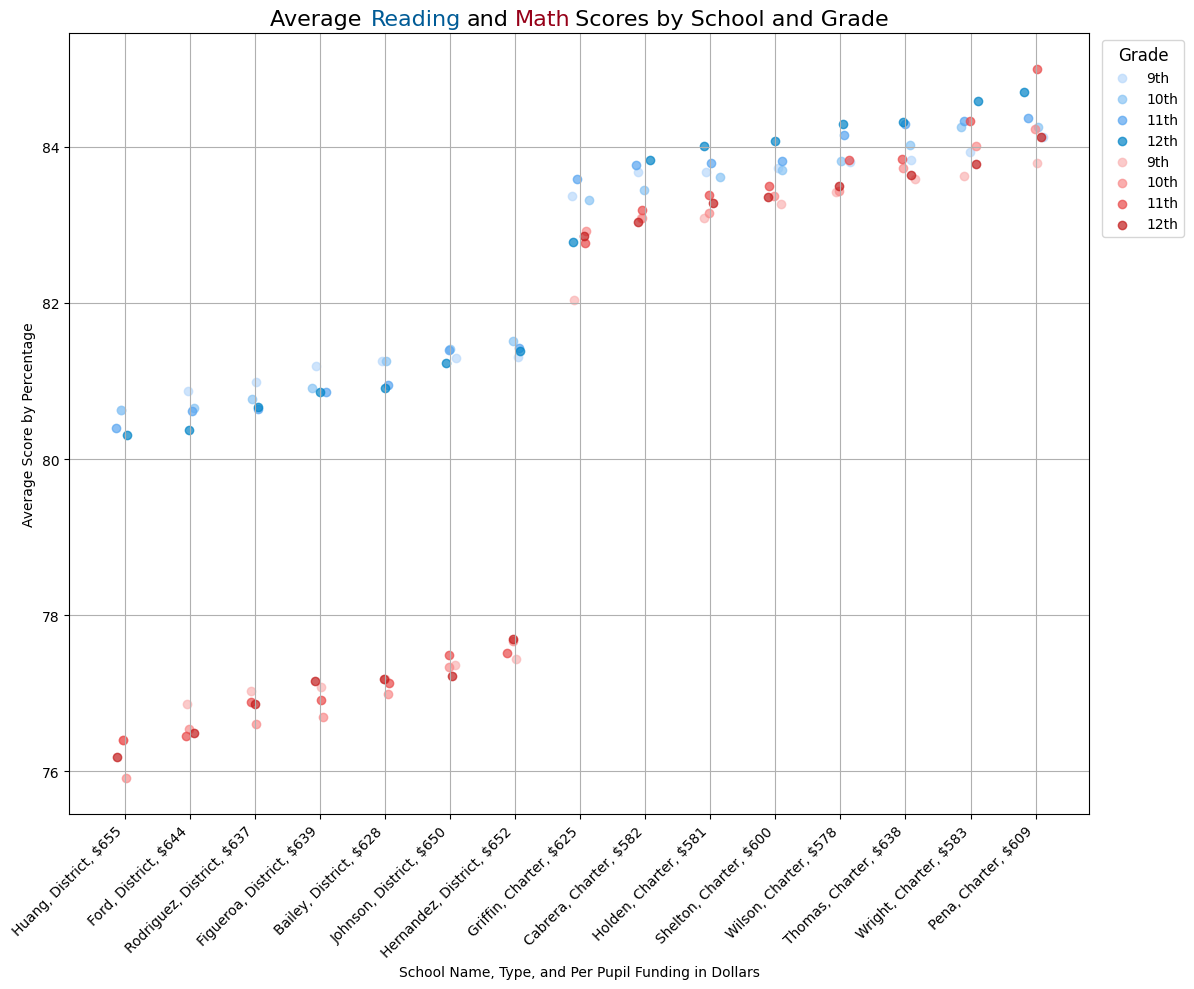

In [53]:
# Import necessary libraries (Matplotlib and NumPy).
import matplotlib.pyplot as plt
import numpy as np

# Create a figure and set its size.
fig, ax = plt.subplots(figsize=(12, 10))

# Define color palettes for reading and math grades.
reading_colors = ['#bad9fb', '#89c4f4',  '#58a5f0', '#0284c7', '#005b96']
math_colors = ['#fab4b4', '#f88c8c', '#e94b4b', '#c31d1d', '#960018']

# Loop through reading and math subjects.
for i, subject in enumerate(['reading', 'math']):
    # Perform data manipulation, calculate average scores for each school and grade and melt the data for easier plotting.
    df_subject = merged_df.pivot_table(index='school_name', columns='grade', values=f'{subject}_score', aggfunc='mean', fill_value=0)[grades].reset_index()
    df_subject_melted = pd.melt(df_subject, id_vars='school_name', var_name='grade', value_name=f'average_{subject}_score')
    
    # Sort the DataFrame by average score.
    df_subject_melted.sort_values(by=f'average_{subject}_score', inplace=True)
    
    # Extracting unique school names from the 'school_name' column for labeling and organization.
    sorted_schools = df_subject_melted['school_name'].unique()
    
    # Extract school type and format school names as "School, Type, Budget".
    school_names = []
    for school in sorted_schools:
        school_type = merged_df.loc[merged_df['school_name'] == school, 'type'].iloc[0]
        cost_per_student = "{:,.0f}".format(merged_df.loc[merged_df['school_name'] == school, 'budget'].iloc[0] / merged_df.loc[merged_df['school_name'] == school, 'size'].iloc[0])
        school_names.append(f"{school.replace(' High School', '')}, {school_type}, ${cost_per_student}")
    
    # Plot the data using scatter plots for each grade.
    for j, grade in enumerate(grades):
        x_values = np.arange(len(sorted_schools))
        y_values = df_subject_melted[(df_subject_melted['grade'] == grade)][f'average_{subject}_score'].values
        jittered_x = x_values + np.random.normal(0, 0.07, len(sorted_schools))
        
        # Specify a colour for the scatter plot based on the subject.
        scatter_color = reading_colors[j] if subject == 'reading' else math_colors[j]
        ax.scatter(jittered_x, y_values, label=f'{grade}', c=scatter_color, alpha=0.7)

# Configure the plot's title, axis labels, school name labels, and legend.
plt.title('Average                              Scores by School and Grade', loc='center', fontdict={'fontsize': 16})
plt.xlabel('School Name, Type, and Per Pupil Funding in Dollars')
plt.xticks(np.arange(len(sorted_schools)), school_names, rotation=45, ha='right')
plt.ylabel('Average Score by Percentage')
plt.legend(title='Grade', title_fontsize='12', loc='best', bbox_to_anchor=(1.1, 1))

# Manually add coloured text to the title using colour names and enable grid lines on the plot.
fig.text(0.317, 0.969, 'Reading', color='#005b96', fontsize=16)
fig.text(0.397, 0.969, 'and', color='black', fontsize=16)
fig.text(0.437, 0.969, 'Math', color='#960018', fontsize=16)
ax.grid(True)

# Automatically adjust the layout to prevent clipping of labels and titles and display the plot.
plt.tight_layout()
plt.show()